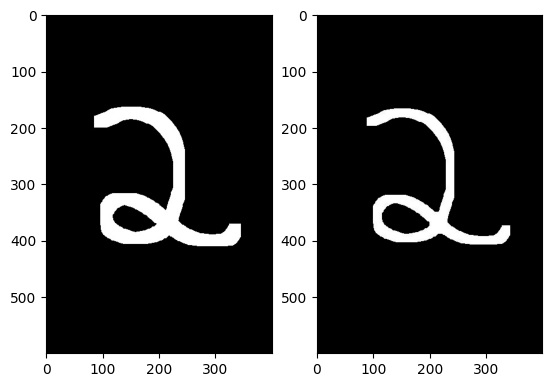

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

src = cv2.imread('Untitle22d.jpg')

image = cv2.erode(src, np.ones((7, 7), dtype=np.uint8), iterations=1)
plt.subplot(1, 2, 1)
plt.imshow(src)
plt.subplot(1, 2, 2)
plt.imshow(image)

In [32]:
def erosion(image: np.ndarray, kernel: np.ndarray, iterations: int=1) -> np.ndarray:
    image = image.astype(np.uint8)
    eroded = image.copy()
    pad_size = kernel.shape[0] // 2
    for _ in range(iterations):
        padded_image = np.pad(eroded, pad_width=pad_size, mode="constant", constant_values=255)
        output = np.zeros_like(eroded)
        for i in range(eroded.shape[0]):
            for j in range(eroded.shape[1]):
                region = padded_image[i : i + kernel.shape[0], j : j + kernel.shape[1]]
                output[i, j] = np.min(region[kernel == 1])
        
        eroded = output

    return eroded

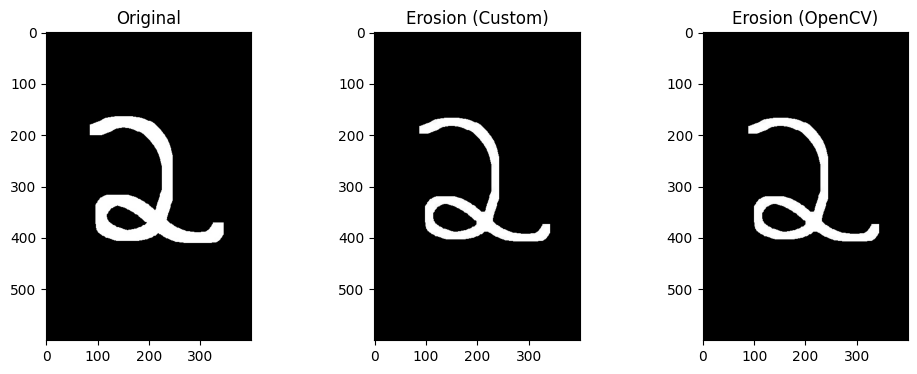

In [33]:
kernel = np.ones((7, 7), dtype=np.uint8)

result = erosion(src, kernel, iterations=1)
opencv_result = cv2.erode(src, kernel, iterations=1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(src, cmap="gray")
plt.title("Original")

plt.subplot(1, 3, 2)
plt.imshow(result, cmap="gray")
plt.title("Erosion (Custom)")

plt.subplot(1, 3, 3)
plt.imshow(opencv_result, cmap="gray")
plt.title("Erosion (OpenCV)")

plt.show()

In [34]:
def dilation(image: np.ndarray, kernel: np.ndarray, iterations: int=1) -> np.ndarray:
    image = image.astype(np.uint8)
    dilate = image.copy()
    pad_size = kernel.shape[0] // 2
    for _ in range(iterations):
        padded_image = np.pad(dilate, pad_width=pad_size, mode="constant", constant_values=0)
        output = np.zeros_like(dilate)
        for i in range(dilate.shape[0]):
            for j in range(dilate.shape[1]):
                region = padded_image[i : i + kernel.shape[0], j : j + kernel.shape[1]]
                output[i, j] = np.max(region[kernel == 1])
        
        dilate = output

    return dilate

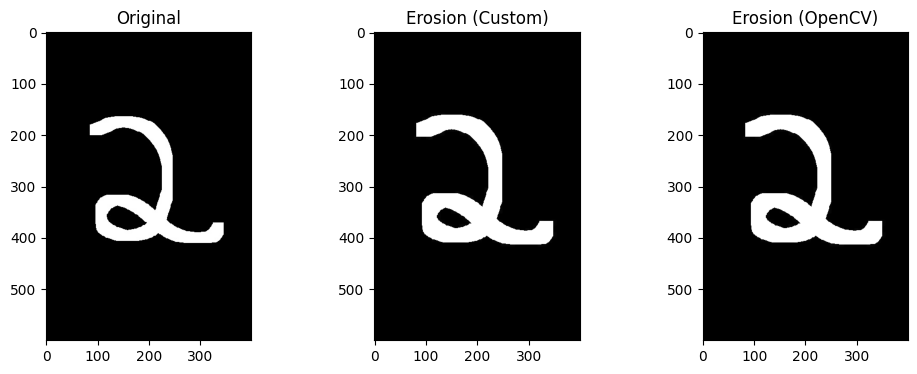

In [35]:
kernel = np.ones((7, 7), dtype=np.uint8)

result_1 = dilation(src, kernel, iterations=1)
opencv_result_1 = cv2.dilate(src, kernel, iterations=1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(src, cmap="gray")
plt.title("Original")

plt.subplot(1, 3, 2)
plt.imshow(result_1, cmap="gray")
plt.title("Erosion (Custom)")

plt.subplot(1, 3, 3)
plt.imshow(opencv_result_1, cmap="gray")
plt.title("Erosion (OpenCV)")

plt.show()

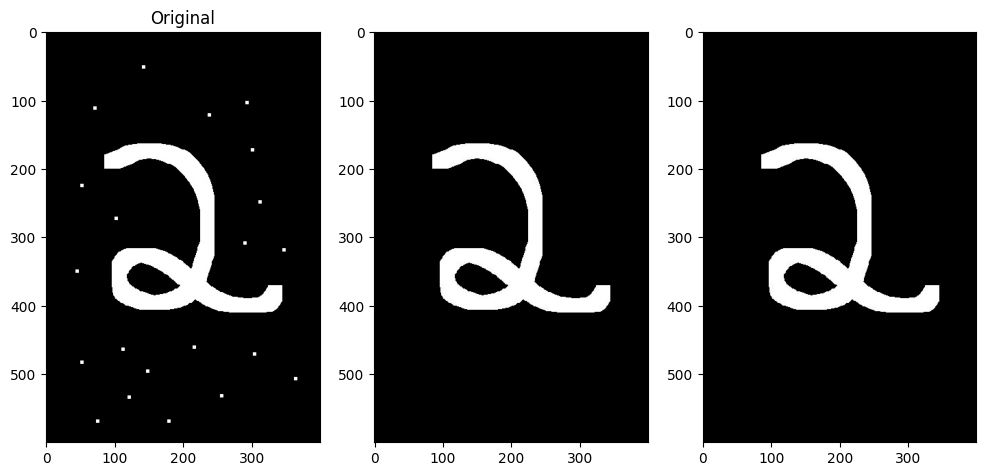

In [36]:
img_test = cv2.imread('test_2.jpg')

result_2 = dilation(erosion(img_test, kernel, iterations=1), kernel, iterations=1)
opencv_result_2 = cv2.morphologyEx(img_test, cv2.MORPH_OPEN, kernel)
plt.figure(figsize=(12, 12))
plt.subplot(1, 3, 1)
plt.imshow(img_test, cmap="gray")
plt.title("Original")

plt.subplot(1, 3, 2)
plt.imshow(result_2, cmap="gray")

plt.subplot(1, 3, 3)
plt.imshow(opencv_result_2, cmap="gray")

plt.show()

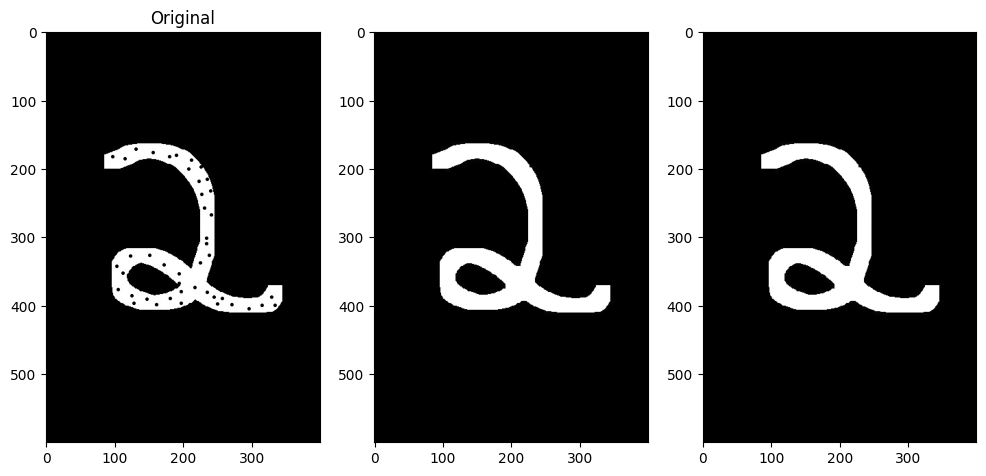

In [37]:
img_test_3 = cv2.imread('test_3.jpg')

result_3 = erosion(dilation(img_test_3, kernel, iterations=1), kernel, iterations=1)
opencv_result_3 = cv2.morphologyEx(img_test_3, cv2.MORPH_CLOSE, kernel)
plt.figure(figsize=(12, 12))
plt.subplot(1, 3, 1)
plt.imshow(img_test_3, cmap="gray")
plt.title("Original")

plt.subplot(1, 3, 2)
plt.imshow(result_3, cmap="gray")

plt.subplot(1, 3, 3)
plt.imshow(opencv_result_3, cmap="gray")

plt.show()